In [1]:
import os 
import MDAnalysis as mda
from MDAnalysis.analysis import align

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB

import seaborn as sns
import json
import re
from io import StringIO
from Bio.SeqUtils import seq1
%matplotlib widget
import IPython
from IPython.core.display import Image
from Bio import pairwise2
from Bio.Seq import Seq
from matplotlib.lines import Line2D
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align import AlignInfo
from scipy import stats

# Assignment questions
> We are providing as set of shuffled protein sequences which have been extracted from several known
families. On the basis of their sequences, it is possible to identify those that are indeed related. 

>1. Write some code that can somehow retrieve how these sequences are related and how they belong to the
same family.

>2. You have to provide a visualisation of these families as a network graph computed within
the same code.

>3. Document your code and make sure it is easy to install and run. 

>4. Communication skills are also important: you need to write a small presentation about how you solved the problem, what are some possible improvement to your methodology, how to make it scalable, etc. 

>5. Creative problem solving is an important aspect hence there are multiple ways in which this problem could be solved. 

## load the sequences

In [2]:
home_path = os.getcwd()
print(home_path)

C:\Users\32470\Downloads\Biostrand_assignment


In [3]:
seq_file = pd.read_csv(home_path+'\\test data scientist shuffled sequences BioStrand.csv', index_col=0, header=0)
seq_file['seq_len'] = [len(x) for x in seq_file['original_sequence']]
print(seq_file)

                                     original_sequence  seq_len
id                                                             
0    GLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKF...      153
1    QSVLTQPPSVSGAPGQRVTISCTGSRSNMGAGYDVHWYQLLPGAAP...      217
2    VQWSAEEKQLISSLWGKVNVAECGAEALARLLIVYPWTQRFFTSFG...      146
3    MHGQVDSSPGIWQLDCTHLEGKVILVAVHVASGYIEAEVIPAETGQ...      163
4    MHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPHTQRFFESFG...      146
..                                                 ...      ...
406  GSHMPKRGRPAATEVKIPKPRGRPPLPAGTNSKGPPDFSSDEEREP...      364
407  CVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS...     1274
408  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      154
409  VQLSGEEKAAVLALWDKVNEEEVGGEALGRLLVVYPWTQRFFDSFG...      145
410  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...      154

[411 rows x 2 columns]


In [7]:
seq_file['seq_len'].max()

1310

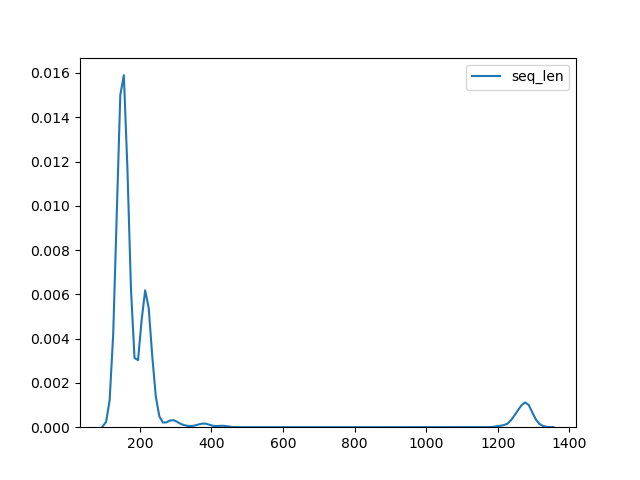

In [4]:
plt.close()
sns.kdeplot(seq_file['seq_len'])
plt.show()

[[ 217.46      ]
 [1271.11538462]
 [ 152.67636364]
 [ 390.        ]
 [ 295.16666667]]


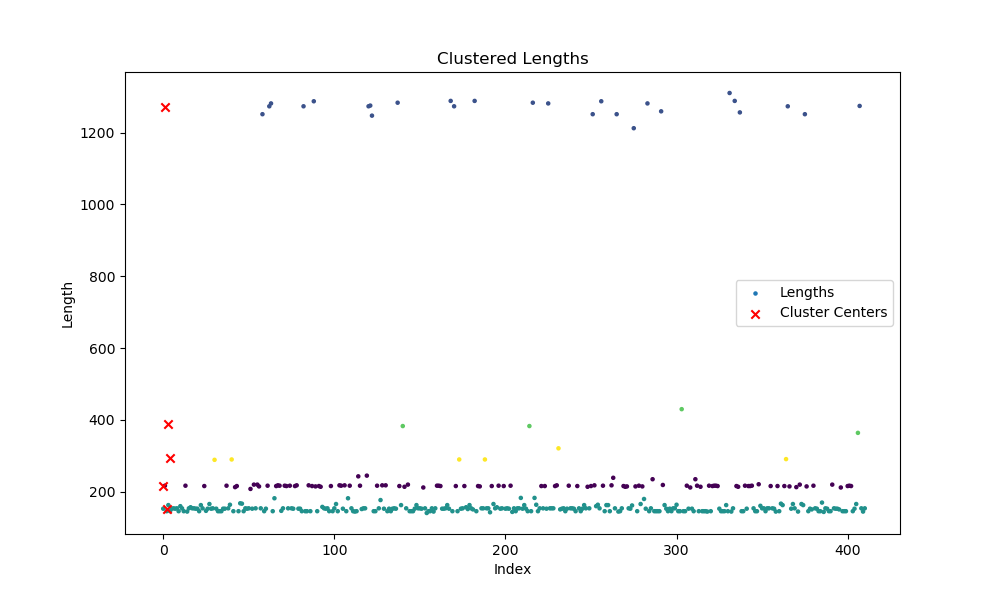

In [13]:
from sklearn.cluster import KMeans

lengths = np.array(seq_file['seq_len']).reshape(-1, 1)
# Define the number of clusters you want
num_clusters = 5  # Adjust as needed

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(lengths)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
# Get the labels for each length
labels = kmeans.labels_

# Plot the cluster centers and lengths

plt.figure(figsize=(10, 6))
plt.scatter(range(len(lengths)), lengths, c=labels, cmap='viridis', label='Lengths', s=5)
plt.scatter(range(num_clusters), cluster_centers, c='red', marker='x', label='Cluster Centers')
plt.title('Clustered Lengths')
plt.xlabel('Index')
plt.ylabel('Length')
plt.legend()
plt.show()

In [17]:
# Create a dictionary to store indices for each cluster
cluster_indices = {cluster: [] for cluster in range(num_clusters)}

# Populate the dictionary with indices
for i, label in enumerate(labels):
#     print(i, label)
    cluster_indices[label].append(i)


In [18]:
cluster_seq_dict = {}
# Print the indices of lengths belonging to each cluster
print("Indices of lengths belonging to each cluster:")
for (cluster, indices), label in zip(cluster_indices.items(), cluster_centers):
    print(f"Cluster {cluster}: {indices}", )
    cluster_seq_dict.update({f"Cluster {cluster+1} ({int(label.round())})": seq_file.iloc[indices]})


Indices of lengths belonging to each cluster:
Cluster 0: [1, 13, 24, 37, 42, 43, 51, 53, 55, 56, 61, 66, 67, 68, 71, 72, 74, 77, 78, 85, 87, 89, 91, 92, 98, 103, 104, 106, 109, 114, 115, 119, 125, 128, 130, 138, 141, 143, 152, 160, 161, 162, 171, 176, 184, 185, 192, 196, 199, 203, 221, 223, 229, 230, 237, 242, 248, 250, 252, 257, 262, 263, 269, 270, 271, 276, 278, 280, 286, 292, 306, 308, 311, 312, 314, 319, 321, 322, 323, 324, 335, 336, 340, 342, 343, 344, 348, 355, 359, 363, 366, 370, 372, 376, 380, 391, 396, 400, 401, 402]
Cluster 1: [58, 62, 63, 82, 88, 120, 121, 122, 137, 168, 170, 182, 216, 225, 251, 256, 265, 275, 283, 291, 331, 334, 337, 365, 375, 407]
Cluster 2: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 52, 54, 57, 59, 60, 64, 65, 69, 70, 73, 75, 76, 79, 80, 81, 83, 84, 86, 90, 93, 94, 95, 96, 97, 99, 100, 101, 102, 105, 107, 108, 110, 111, 112, 113, 116, 1

In [53]:
cluster_seq_dict.keys()

dict_keys(['Cluster 1 (390)', 'Cluster 2 (1271)', 'Cluster 3 (153)', 'Cluster 4 (217)', 'Cluster 5 (295)'])

In [92]:
from Bio import SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline



In [87]:
large_cluster_seq_dict = {}
for i, j in cluster_seq_dict.items():
    print(i)
#     print(j)
    max_len = j['seq_len'].max()
#     print(max_len)
    GAPs = "-"
    sequences = {}
    for s in j.index:
#         print(s)
        seq = j['original_sequence'].loc[s]
#         print(seq)
        
        padding = GAPs*(max_len - len(seq)) # creating the padding string
        seq += padding
        sequences.update({f'>sequence_{s}': seq})
#         print(seq)
#     SeqIO.write(sequences, 'newseq.fasta', 'fasta')
    large_cluster_seq_dict.update({i: sequences})
    
    
    cluster_seq_record = [SeqRecord(Seq(m), id=i) for i, m in sequences.items()]
#     print(cluster_seq_record)
    # Convert sequences to a string in FASTA format
    fasta_sequences = "\n".join([f"{seq_id}\n{seq}" for seq_dict in sequences for seq_id, seq in sequences.items()])
#     print(sequences)
    # Output filename
    
    output_file = "output.fasta"

    # Write sequence records to a FASTA file
    SeqIO.write(seq_records, output_file, "fasta")

    print(f"Sequence records have been written to {output_file}.")

Cluster 1 (217)
Cluster 2 (1271)
Cluster 3 (153)
Cluster 4 (390)
Cluster 5 (295)


In [80]:
from itertools import combinations

# elements = ['a1', 'y1', 'y4', 'b2']
# combinations_without_repetition = list(set((min(x, y), max(x, y)) for x, y in combinations(elements, 2)))
# print(combinations_without_repetition)


In [89]:
# print(fasta_sequences)

In [83]:
for i, j in large_cluster_seq_dict.items():
    # make combinations for pairwise alignments
#     print(list(j.keys()))
    combinations_ = list(set((min(x, y), max(x, y)) for x, y in combinations(list(j.keys()), 2)))
    print(len(combinations_))
#     break

4950
325
37675
6
15


In [14]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align import AlignInfo
from Bio import SeqIO

In [90]:
home_path

'C:\\Users\\32470\\Downloads\\Biostrand_assignment'

In [93]:
from Bio.Align.Applications import ClustalOmegaCommandline

# Path to the Clustal Omega executable
clustalo_exe = home_path+"\\clustal-omega-1.2.2-win64\\clustalo.exe"  # Update this with the actual path to clustalo.exe



# Create Clustal Omega command-line object
clustalo_cline = ClustalOmegaCommandline(clustalo_exe, infile=home_path+'\\test.fasta', outfile=output_file)

# Execute Clustal Omega
stdout, stderr = clustalo_cline()

NameError: name 'output_file' is not defined

In [8]:

seq_records = [SeqRecord(Seq(seq), id=f"sequence_{i}") for i, seq in enumerate(seq_file['original_sequence'], 1)]

print(seq_records[0])
# Create a MultipleSeqAlignment


ID: sequence_1
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('GLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAE...FQG')


In [58]:
# Write sequences to a FASTA file
with open(home_path+"\\protein_bs.fasta", "w") as output_handle:
    SeqIO.write(seq_records, output_handle, "fasta")

In [62]:
print(seq_records[331].seq)

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGR

In [66]:
print(seq_records[334].seq)

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPGSASSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGR

In [46]:
from functools import wraps
from time import time

def measure(func):
    @wraps(func)
    def _time_it(*args, **kwargs):
        start = time()
        try:
            return func(*args, **kwargs)
        finally:
            end_ = time() - start
            mins, secs = divmod(end_, 60)
            print(f"Total execution time: {mins:.0f} mins {secs:.2f} secs")
    return _time_it



In [69]:
alignment_1 = pairwise2.align.globalxx(seq_records[331].seq, seq_records[334].seq)
print(alignment_1[0])

Alignment(seqA='MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRR--ARS-VASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDIL

In [71]:
print(alignment_1[0].seqA)
print(alignment_1[0].seqB)

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRR--ARS-VASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKV--EAEVQIDR

In [74]:
alignment_1[0].score/alignment_1[0].end

0.9287305122494433

In [47]:
@measure
def identity_mat(seq_records):
    identity_matrix = {}
    for x in seq_records:
    #     print(x)
        for y in seq_records:
            alignment = pairwise2.align.globalxx(x.seq, y.seq)
            best_alignment = alignment[0]
            identity = best_alignment.score/best_alignment.end
            identity_matrix.update({f'{x}_{y}': identity})
    return identity_matrix